# **Data preprocessing** 🧮

This notebook includes a series of steps to load, clean, and analyze a dataset. We will:

1. Load the survey data.
   
2. Analyze missing values.
   
3. Handle missing values.
   
4. Export cleaned dataset.

### **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import os
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the survey data** 📥

First, we'll load the data from the CSV file into a pandas DataFrame and display the first few rows to understand the structure of the dataset.

- We'll load the CSV file into pandas DataFrame using `pd.read_csv(file_path)`.
  
- Then we'll use `head(3)` to display the first 3 rows of the data.

In [2]:
# Function to get the current working directory
def get_notebook_directory():
    return os.getcwd()

# Function to get the path of the data folder
def get_data_folder(base_dir, folder_name='data'):
    # Navigate to the parent directory
    parent_dir = os.path.abspath(os.path.join(base_dir, os.pardir))
    data_folder = os.path.join(parent_dir, folder_name)
    return data_folder

# Get the current working directory (where the notebook is located)
notebook_dir = get_notebook_directory()

# Get the path of the 'data' folder
data_folder_path = get_data_folder(notebook_dir, folder_name='data')

# Paths to subfolders
raw_data_path = os.path.join(data_folder_path, '01_Raw')
interim_data_path = os.path.join(data_folder_path, '02_Interim')
processed_data_path = os.path.join(data_folder_path, '03_Processed')

print(f"Ścieżka do folderu 'data': {data_folder_path}")
print(f"Ścieżka do folderu '01_Raw': {raw_data_path}")
print(f"Ścieżka do folderu '02_Interim': {interim_data_path}")
print(f"Ścieżka do folderu '03_Processed': {processed_data_path}")

# Example path to a data file in the '01_Raw' folder
file_name = '01_DataCompetencySurvey.csv'
data_file_path = os.path.join(raw_data_path, file_name)

# Read data into DataFrame
data = pd.read_csv(data_file_path)

Ścieżka do folderu 'data': c:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data
Ścieżka do folderu '01_Raw': c:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\01_Raw
Ścieżka do folderu '02_Interim': c:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\02_Interim
Ścieżka do folderu '03_Processed': c:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\03_Processed


# Basic statistics

In [3]:
data.describe()

,ID,Nazwa,Czas ostatniej modyfikacji,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,67.000000,0.0,0.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,34.000000,NaN,NaN,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,...,1.400000,1.733333,1.483333,1.050000,1.633333,1.216667,1.333333,1.233333,1.416667,1.083333
std,19.485037,NaN,NaN,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,...,0.960226,1.147830,1.016669,0.909926,0.956098,0.922261,0.985775,0.908839,0.869281,0.869281
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,NaN,NaN,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000
50%,34.000000,NaN,NaN,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,50.500000,NaN,NaN,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


### **Analyzing missing values** 🔎

Next, we'll check which columns have missing values and how many missing values there are. This step helps us understand the completeness of the data and plan for handling any missing values.

This step is crucial for understanding the quality of the dataset and planning how to handle any gaps in the data. We will explore the following:

- Simple overview of missing values to identify which columns have missing values and how many missing values there are in each column,
  
- Percentage of missing values for each column to get a better sense of the data quality,

- Visualizing missing data to get a more intuitive understanding of where the missing values are located.

Let's now check which rows we should consider removing from the dataset.

In [4]:
# Checking for non-null values
non_null_values = data.notnull().sum()
print("\nNon-null values:")
# Sorting non-null values in ascending order
non_null_values_sorted = non_null_values.sort_values(ascending=True)
# Print only the top 10 non-null values
print(non_null_values_sorted.head(10))


Non-null values:
Nazwa                                                                                                   0
Czas ostatniej modyfikacji                                                                              0
Jeżeli pominięto branżę, na której się znasz dopisz ją:                                                10
Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:                            13
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    19
Area: Computer Vision                                                                                  59
Area: NLP                                                                                              59
Area: Classical ML (Clustering, Regression, Classification)                                            59
BI: Tableau                                                                                            59
BI: PowerBI                 

### **Percentage of missing values** °/•

To understand the extent of missing values, we calculate their percentage for each column and sort them accordingly.

In [5]:
# Calculate the percentage of missing values
missing_percentage = (non_null_values_sorted / len(data)) * 100

# Print the percentage of missing values
print("\nPercentage of missing values:")

# Sort the missing percentages in ascending order and filter out non-missing values
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=True)

# Print the top 10 values
top_5_missing_percentage = missing_percentage_sorted.head()
print(top_5_missing_percentage)


Percentage of missing values:
Jeżeli pominięto branżę, na której się znasz dopisz ją:                                                14.925373
Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:                            19.402985
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    28.358209
Front End: (HTML, JavaScript, CSS)                                                                     88.059701
Programming: R                                                                                         88.059701
dtype: float64


### **Visualizing missing data** 🕵️‍♀️

Visualizations can help us quickly understand the distribution of missing values in the dataset. We will use a heatmap to visualize missing data.

#### Heatmap

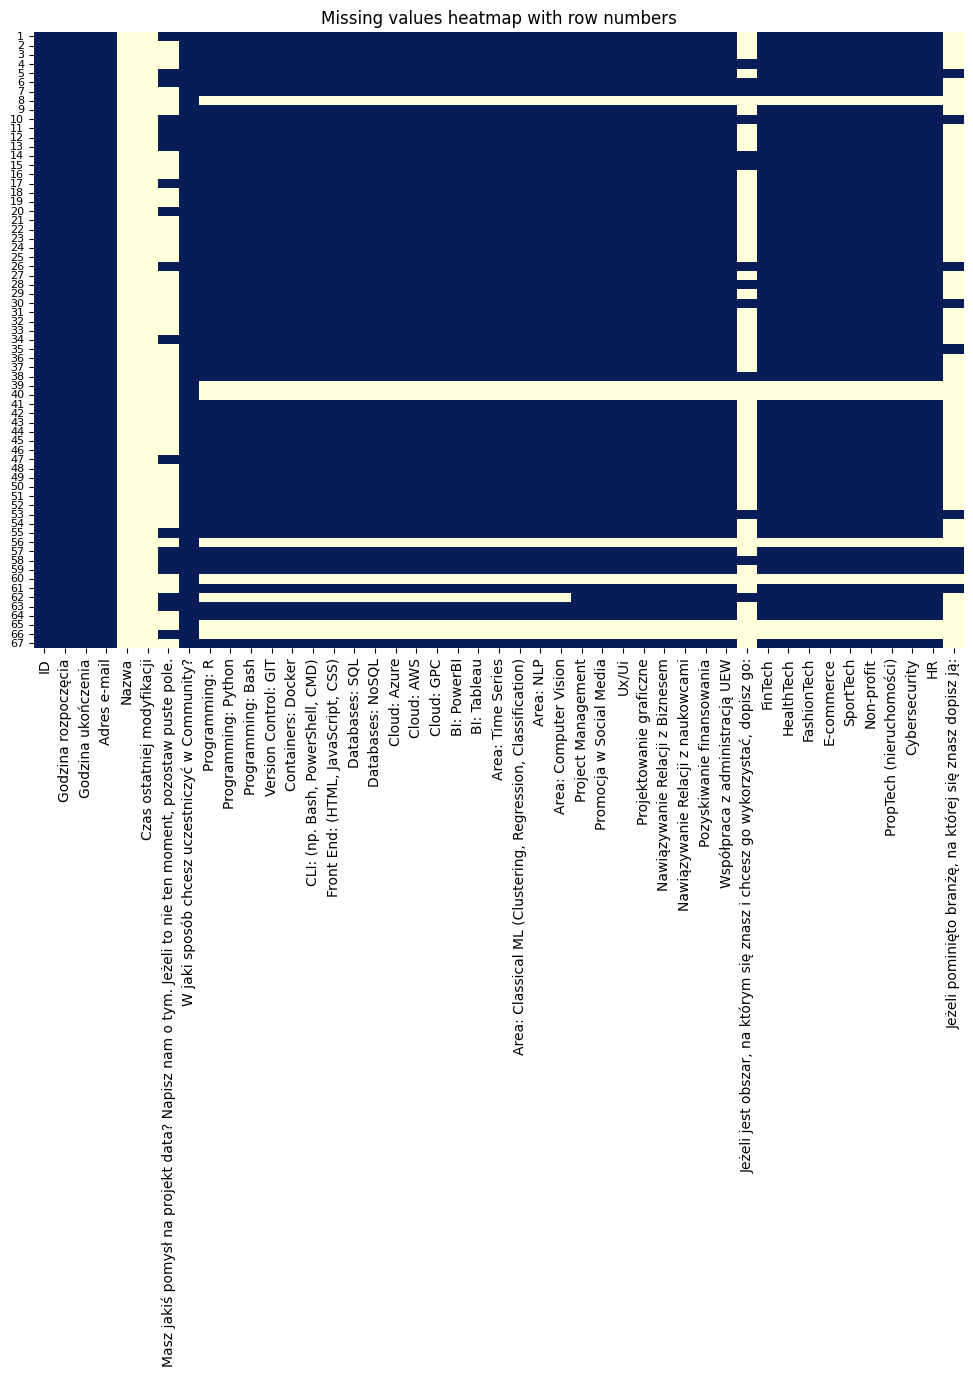

In [6]:
# Visualizing missing values using a heatmap with row numbers
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='YlGnBu_r', yticklabels=(data.index + 1), annot=False)
plt.yticks(fontsize=8)
plt.title('Missing values heatmap with row numbers')
plt.show()


In [7]:
# Identifying top 10 rows with the most missing values
missing_values_count = data.isnull().sum(axis=1)
rows_with_most_missing = missing_values_count.sort_values(ascending=False).head(10)

print(rows_with_most_missing)

55    40
64    40
7     40
39    40
38    40
59    40
65    39
61    21
1      5
48     5
dtype: int64


## **Handling missing values**

### Removing columns with high percentage of missing values ⛔

Knowing the number of rows and columns and specific rows with the most missing values we can now specify the threshold. If any row has more than a specified threshold - 70% of missing values, we might consider removing it.

In [8]:
# Defining the threshold for missing values (our threshold will be 30%)
threshold = 30

# Calculating the percentage of missing values in each row
missing_percentage = data.isnull().mean(axis=1) * 100

# Identifying rows where missing values exceed the threshold
rows_above_threshold = data[missing_percentage > threshold]

# Printing rows that have missing values exceeding the threshold
print("\nRows with missing values exceeding 30% threshold:")
print(rows_above_threshold)

# If you want to drop these rows from the original dataset
data_cleaned = data[missing_percentage <= threshold]


Rows with missing values exceeding 30% threshold:
    ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  Nazwa  \
7    8  2024-03-05 15:50:55  2024-03-05 15:52:28    anonymous    NaN   
38  39  2024-03-06 19:15:27  2024-03-06 19:15:56    anonymous    NaN   
39  40  2024-03-06 19:48:41  2024-03-06 19:48:50    anonymous    NaN   
55  56  2024-03-15 07:11:47  2024-03-15 07:12:01    anonymous    NaN   
59  60  2024-03-25 15:50:03  2024-03-25 15:50:19    anonymous    NaN   
61  62  2024-03-26 09:52:57  2024-03-26 09:57:41    anonymous    NaN   
64  65  2024-04-08 10:31:25  2024-04-08 10:32:10    anonymous    NaN   
65  66  2024-04-08 21:45:20  2024-04-08 21:46:43    anonymous    NaN   

    Czas ostatniej modyfikacji  \
7                          NaN   
38                         NaN   
39                         NaN   
55                         NaN   
59                         NaN   
61                         NaN   
64                         NaN   
65                         N

In [9]:
# Columns to drop based on the missing percentage
columns_to_drop = [
    'Nazwa',
    'Czas ostatniej modyfikacji',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'
]

# Dropping the specified columns from the cleaned dataset
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

# Checking the size of the cleaned dataset after dropping columns
dataset_size = data_cleaned_dropped.shape

# Display the size of the cleaned dataset
print("Number of rows:", dataset_size[0])
print("Number of columns:", dataset_size[1])

# Display the first few rows of the updated dataset to confirm the columns are dropped
print(data_cleaned_dropped.head(2))

Number of rows: 59
Number of columns: 40
   ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  \
0   1  2024-03-05 15:25:52  2024-03-05 15:33:04    anonymous   
1   2  2024-03-05 15:29:46  2024-03-05 15:35:02    anonymous   

      W jaki sposób chcesz uczestniczyć w Community?  Programming: R  \
0  Chcę uczestniczyć w projekcie data i organizow...             2.0   
1                 Chcę uczestniczyć w projekcie data             3.0   

   Programming: Python  Programming: Bash  Version Control: GIT  \
0                  3.0                3.0                   4.0   
1                  3.0                1.0                   3.0   

   Containers: Docker  ...  Współpraca z administracją UEW  FinTech  \
0                 3.0  ...                             2.0      3.0   
1                 2.0  ...                             1.0      2.0   

   HealthTech  FashionTech  E-commerce  SportTech  Non-profit  \
0         2.0          3.0         3.0        3.0         2.0   
1  

In [10]:
# Dropping columns that contain 'Godzina' or 'Adres' in their names and other specified columns
columns_to_drop_time_address = [col for col in data.columns if 'Godzina' in col or 'Adres' in col] + ['Nazwa', 'Czas ostatniej modyfikacji']
data_cleaned = data.drop(columns_to_drop_time_address, errors='ignore')

# Saving the cleaned dataset to a CSV file
#cleaned_file_path = r'C:\Users\mikol\Documents\GitHub\ProjektAnalitiks\data\02_Interim\cleaned.csv'
#data_cleaned.to_csv(cleaned_file_path, index=False)

In [11]:
# Dropping columns that contain 'Godzina' or 'Adres' in their names and other specified columns
columns_to_drop_time_address = [col for col in data_cleaned_dropped.columns if 'Godzina' in col or 'Adres' in col] + ['Nazwa', 'Czas ostatniej modyfikacji']
data_cleaned2 = data_cleaned_dropped.drop(columns_to_drop_time_address, errors='ignore')

data_cleaned2 = data_cleaned2.drop(['Godzina rozpoczęcia', 'Godzina ukończenia', 'Adres e-mail'], axis = 1)

# Saving the cleaned dataset to a CSV file
#cleaned_file_path2 = r'C:\Users\mikol\Documents\GitHub\ProjektAnalitiks\data\03_Processed\data_cleaned.csv'
#data_cleaned2.to_csv(cleaned_file_path2, index=False)

### Saving data to ***CSV*** files

In [12]:
def save_dataframe_to_csv(df, folder_path, file_name):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_path = os.path.join(folder_path, file_name)
    df.to_csv(file_path, index=False)
    print(f"Zapisano {file_name} do {folder_path}")


save_dataframe_to_csv(data_cleaned, interim_data_path, 'cleaned.csv')
save_dataframe_to_csv(data_cleaned2, processed_data_path, 'data_cleaned.csv')

Zapisano cleaned.csv do c:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\02_Interim
Zapisano data_cleaned.csv do c:\Users\rejen\OneDrive\Documents\GitHub\ProjektAnalitiks\data\03_Processed
